In [58]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [59]:
train_data = pd.read_csv("./DataSets/Train.csv")
train_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
# check the length of the datasets
len(train_data)

8523

### Finding out percentages of missing values in each columns

In [4]:
round((train_data.isnull().sum()/len(train_data)*100),1)

Item_Identifier               0.0
Item_Weight                  17.2
Item_Fat_Content              0.0
Item_Visibility               0.0
Item_Type                     0.0
Item_MRP                      0.0
Outlet_Identifier             0.0
Outlet_Establishment_Year     0.0
Outlet_Size                  28.3
Outlet_Location_Type          0.0
Outlet_Type                   0.0
Item_Outlet_Sales             0.0
dtype: float64

## Note:
#### from the above Item_Weight  and Outlet_Size hase more than 15 percent of missing value present

In [5]:
x = pd.get_dummies(train_data[["Outlet_Identifier","Outlet_Size"]])
x.head()

,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,1,0,0


In [6]:
cor_mat = train_data.corr()
cor_mat

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [7]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
train_data.Item_Weight.mean()

12.857645184136183

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
#lets replace item weight with mean item_weight
train_data.Item_Weight.fillna(train_data.Item_Weight.mean(),inplace=True)

In [11]:
#now check wheather New created weight has missing value or not
train_data.Item_Weight.isnull().sum()

0

## Including 1 independent variable

In [12]:
X = train_data[["Item_Weight"]]
Y = train_data[["Item_Outlet_Sales"]]

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
#print shape of each training and test set
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((6818, 1), (1705, 1), (6818, 1), (1705, 1))

In [14]:
#creating a linear regression object
lin_reg = LinearRegression()

model1 = lin_reg.fit(X_train,Y_train)

In [15]:
#predicting result
y_pred = model1.predict(X_test)

In [16]:
#checking root mean squre error and r squre value
print("RMSE: ",np.sqrt(mean_squared_error(Y_test,y_pred)))
print("R-Squre: ",model1.score(X_test,Y_test))

RMSE:  1710.5806783859412
R-Squre:  0.0002641724309024873


### Residual Plot for Item_Weight variable 

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

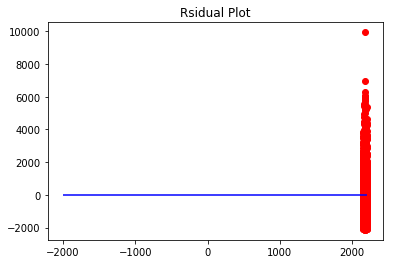

In [18]:
plt.scatter(y_pred,(Y_test - y_pred),color="red")
plt.hlines(y=0, xmin=-2000, xmax=2210,color="b")
plt.title("Rsidual Plot")
plt.show()

# Including 2 independent variable

In [19]:
X = train_data[["Item_Weight","Item_Visibility"]]
Y = train_data[["Item_Outlet_Sales"]]

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [20]:
#creating a linear regression object
lin_reg = LinearRegression()

model1 = lin_reg.fit(X_train,Y_train)

#predicting result
y_pred = model1.predict(X_test)

#checking root mean squre error and r squre value
print("RMSE: ",np.sqrt(mean_squared_error(Y_test,y_pred)))
print("R-Squre: ",model1.score(X_test,Y_test))

RMSE:  1695.121265947948
R-Squre:  0.01825278850441303


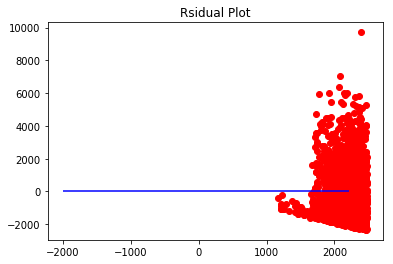

In [21]:
plt.scatter(y_pred,(Y_test - y_pred),color="red")
plt.hlines(y=0, xmin=-2000, xmax=2210,color="b")
plt.title("Rsidual Plot")
plt.show()

# Note:
* after introducing new variable Item_visibility our rmse and r2 score increased that means Item visibility has higher importance for predicting dependent variable sales

# Including 3 independent variable

In [22]:
#adding Item_MRP column
X = train_data[["Item_Weight","Item_Visibility","Item_MRP"]]
Y = train_data[["Item_Outlet_Sales"]]

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [23]:
#creating a linear regression object
lin_reg = LinearRegression()

model1 = lin_reg.fit(X_train,Y_train)

#predicting result
y_pred = model1.predict(X_test)

#checking root mean squre error and r squre value
print("RMSE: ",np.sqrt(mean_squared_error(Y_test,y_pred)))
print("R-Squre: ",model1.score(X_test,Y_test))

RMSE:  1397.4584476729813
R-Squre:  0.33276942591997094


# Note:
* after introducing 3rd variable Item_MRP our rmse value further reduced and r2 score increased very large from 1.8% to 33% that means Item_MRP has higher importance for predicting dependent variable for sales

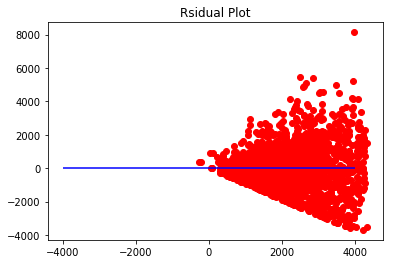

In [24]:
plt.scatter(y_pred,(Y_test - y_pred),color="red")
plt.hlines(y=0, xmin=-4000, xmax=4000,color="b")
plt.title("Rsidual Plot")
plt.show()

## Note from Residual plot:
* from the above residual plot we can see that its kind of funnel shape that means errors are not normally distributed,errors are actually not constant. From the assumption of linear regression if errors are not constant that means it indicates * heteroskedasticity * and it happens due to the outliers

# Including 4 independent variable

In [25]:
#checking NaN value in outlet_size column
train_data.Outlet_Size.value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [26]:
#replacing NaN value with small in outlet_size column

train_data.Outlet_Size.fillna("Small", inplace=True)

#checking NaN value in outlet_size column has removed and replaced with small or not
train_data.Outlet_Size.value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

## create dummies for Outletsize

In [27]:
#creating dummy column for Outlet_size
dumies = pd.get_dummies(train_data["Outlet_Size"])
dumies.head()

,High,Medium,Small
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,1,0,0


In [28]:
#concat this dummies with train data
New_train_data = pd.concat([train_data, dumies], axis = 1)
New_train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,High,Medium,Small
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,1,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,1,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,1,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,0,0,1
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1,0,0


In [29]:
#lets replace item weight with mean item_weight
New_train_data.Item_Weight.fillna(train_data.Item_Weight.mean(),inplace=True)

In [30]:
#adding Item_MRP column
X = New_train_data[["Item_Weight","Item_Visibility","Item_MRP","High","Medium","Small"]]
Y = New_train_data[["Item_Outlet_Sales"]]

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [31]:
#creating a linear regression object
lin_reg = LinearRegression()

model1 = lin_reg.fit(X_train,Y_train)

#predicting result
y_pred = model1.predict(X_test)

#checking root mean squre error and r squre value
print("RMSE: ",np.sqrt(mean_squared_error(Y_test,y_pred)))
print("R-Squre: ",model1.score(X_test,Y_test))

RMSE:  1345.764499479983
R-Squre:  0.3812200014247775


# Note:
* after introducing 4th variable Outlet_size our rmse value further reduced and r2 score again increased from 33% to 38% 
* That means the more variable we are introducing the R squre value is increasing that means we can not justify our model using R squre value

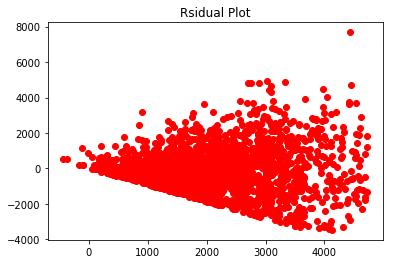

In [32]:
plt.scatter(y_pred,(Y_test - y_pred),color="red")
#plt.hlines(y=0, xmin=-4000, xmax=4000,color="b")
plt.title("Rsidual Plot")
plt.show()

In [33]:
#creating dummy column for outlet_location
dumies1 = pd.get_dummies(train_data["Outlet_Location_Type"])
dumies1.head()

,Tier 1,Tier 2,Tier 3
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1


In [34]:
New_train_data2 = pd.concat([New_train_data,dumies1], axis=1)
New_train_data2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,High,Medium,Small,Tier 1,Tier 2,Tier 3
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,1,0,1,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,1,0,0,0,1
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,1,0,1,0,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,0,0,1,0,0,1
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1,0,0,0,0,1


In [35]:
#adding Item_MRP column
X = New_train_data2[["Item_Weight","Item_Visibility","Item_MRP","High","Medium","Small","Tier 1","Tier 2","Tier 3"]]
Y = New_train_data2[["Item_Outlet_Sales"]]

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [36]:
#creating a linear regression object
lin_reg = LinearRegression()

model1 = lin_reg.fit(X_train,Y_train)

#predicting result
y_pred = model1.predict(X_test)

#checking root mean squre error and r squre value
print("RMSE: ",np.sqrt(mean_squared_error(Y_test,y_pred)))
print("R-Squre: ",model1.score(X_test,Y_test))

RMSE:  1289.9054986158103
R-Squre:  0.43152166266725883


# Note:
* after introducing 5th variable Outlet_Location_Type our rmse value further reduced and r2 score again increased from 38% to 43%

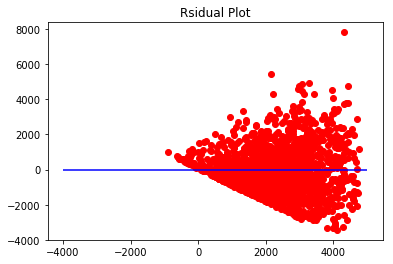

In [37]:
plt.scatter(y_pred,(Y_test - y_pred),color="red")
plt.hlines(y=0, xmin=-4000, xmax=5000,color="b")
plt.title("Rsidual Plot")
plt.show()

---

In [38]:
New_train_data2.Outlet_Establishment_Year.min()

1985

In [45]:
obj_col = ['Item_Identifier','Item_Fat_Content','Item_Type', 'Outlet_Identifier','Outlet_Type'] 

dumies2 = pd.get_dummies(train_data[obj_col])
dumies2.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
# now there is no need of keeping those original columns which we already have created dummies

New_train_data2.drop(obj_col,axis=1,inplace=True)

In [49]:
New_train_data2.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,High,Medium,Small,Tier 1,Tier 2,Tier 3
0,9.30,0.016047,249.8092,1999,Medium,Tier 1,3735.1380,0,1,0,1,0,0
1,5.92,0.019278,48.2692,2009,Medium,Tier 3,443.4228,0,1,0,0,0,1
2,17.50,0.016760,141.6180,1999,Medium,Tier 1,2097.2700,0,1,0,1,0,0
3,19.20,0.000000,182.0950,1998,Small,Tier 3,732.3800,0,0,1,0,0,1
4,8.93,0.000000,53.8614,1987,High,Tier 3,994.7052,1,0,0,0,0,1


In [50]:
#drop those columns which do not want to use
New_train_data2.drop(["Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type"],axis=1,inplace=True)

In [51]:
New_train_data2.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,High,Medium,Small,Tier 1,Tier 2,Tier 3
0,9.30,0.016047,249.8092,3735.1380,0,1,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,0,1,0,0,0,1
2,17.50,0.016760,141.6180,2097.2700,0,1,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,0,0,1,0,0,1
4,8.93,0.000000,53.8614,994.7052,1,0,0,0,0,1


In [52]:
# Now add all those dummy columns that you have created
New_train_data3 = pd.concat([New_train_data2,dumies2], axis=1)
New_train_data3.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,High,Medium,Small,Tier 1,Tier 2,Tier 3,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [55]:
#removing Item outletsales from new dummies
X = New_train_data3[New_train_data3.columns.difference(["Item_Outlet_Sales"])]
Y = train_data[["Item_Outlet_Sales"]]

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [56]:
#creating a linear regression object
lin_reg = LinearRegression()

model1 = lin_reg.fit(X_train,Y_train)

#predicting result
y_pred = model1.predict(X_test)

#checking root mean squre error and r squre value
print("RMSE: ",np.sqrt(mean_squared_error(Y_test,y_pred)))
print("R-Squre: ",model1.score(X_test,Y_test))

RMSE:  1315.930881196793
R-Squre:  0.40835078964765736


# ==================

In [60]:
# code for selecting the all object columns from the data sets
list1 = list(train_data.select_dtypes(include=['object']).columns)
list1

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [61]:
# code for not selecting the all object columns from the data sets
list(train_data.select_dtypes(exclude=["object"]).columns)

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

# ============